# Domácí úloha 5

### Tomáš Novotný


Načtení potřebných knihoven

In [158]:
import sklearn as sk
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np  
from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.rule import FuzzyRule
from fuzzy_expert.inference import DecompositionalInference
from sklearn.metrics import accuracy_score


Načtení datasetu

In [159]:
iris = datasets.load_iris()

### Návrh lingvistických proměnných

Na základě analýzy datasetu IRIS na stránce *Cvičení 9* jsem navrhl 4 `vstupní lingvistické proměnné` a 1 `výstupní`.

In [160]:
variables = {
    "petal_length": FuzzyVariable(
        universe_range=(0,10),
        terms={
            "Low": [(0.9, 0),(1, 1),(3, 0)],
            "Medium": [(2, 0),(4, 1),(6, 0)],
            "High": [(5, 0),(6, 1),(7, 0)],
        },
    ),
    "petal_width": FuzzyVariable(
        universe_range=(0, 5),
        terms={
            "Low": [(0, 0),(0.1, 1),(1, 0)],
            "Medium": [(0.7, 0),(1.3, 1),(1.8, 0)],
            "High": [(1.3, 0),(2, 1),(2.5, 0)],
        },
    ),
    "sepal_length": FuzzyVariable(
        universe_range=(0,10),
        terms={
            "mf1": [(4.2, 0),(5.2, 1),(8, 0)],
        },
    ),
    "sepal_width": FuzzyVariable(
        universe_range=(0, 5),
        terms={
            "mf1": [(2, 0),(3.2, 1),(4.4, 0)],
        },
    ),
    "decision": FuzzyVariable(
        universe_range=(-1, 3),
        terms={
            "Iris Setosa": [(-0.5, 0), (0, 1), (0.5, 0)],
            "Iris Versicolor": [(0.5, 0), (1, 1), (1.5, 0)],
            "Iris Virginica": [(1.5, 0), (2, 1), (2.5, 0)],
        },
    ),
}

### Vizualizace funkcí příslušnosti ligvistických proměnných

Na následujících grafem si můžeme prohlédnout funkce příslušnosti pro jednotlivé lingvistické proměnné

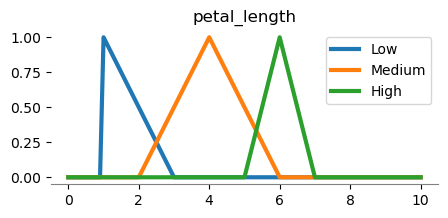

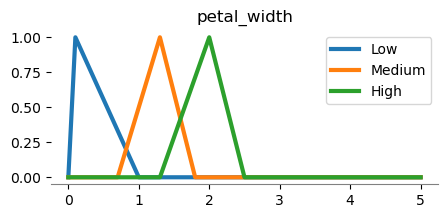

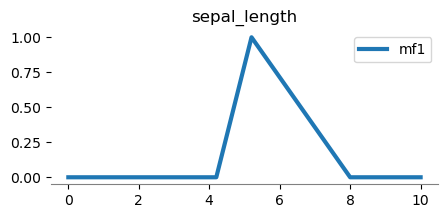

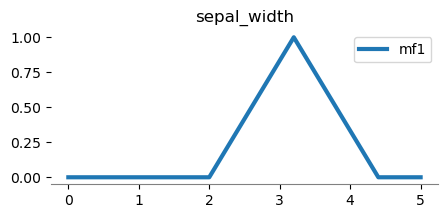

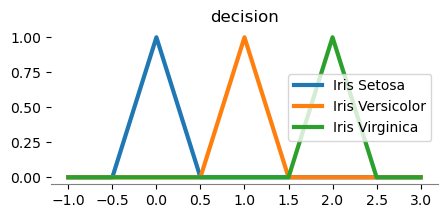

In [161]:
for x in variables:
    fig, ax = plt.subplots(figsize=(5,2))
    ax.set_title(x)
    variables[x].plot()
# v.plot_input(value=185, fuzzyset='High', view_xaxis=True, view_yaxis='right')

### Návrh pravidel

Implementace pravidel vychází z analýzy *Cvičení 9*, konkrétně:
* IF **Petal Width** je `H` THEN Klasifikace je **Iris Virginica**
* IF **Petal Width** je `L` THEN the Klasifikace je **Iris Setosa**
* IF **Petal Width** je `M` and **Petal Length** je `M` THEN Klasifikace je **Iris Versicolor**
* IF **Petal Width** je `M` and **Petal Length** je `H` THEN Klasifikace je **Iris Virginica**


In [163]:
rules = [
 FuzzyRule(
      premise=[
            ("petal_width", "High"),
     ],
     consequence=[("decision", "Iris Virginica")],
 ),
 FuzzyRule(
      premise=[
            ("petal_width", "Low"),
     ],
     consequence=[("decision", "Iris Setosa")],
 ),
 FuzzyRule(
      premise=[
            ("petal_width", "Medium"),
            ("AND", "petal_length", "Medium"),
     ],
     consequence=[("decision", "Iris Versicolor")],
 ),
 FuzzyRule(
      premise=[
            ("petal_width", "Medium"),
            ("AND", "petal_length", "High"),
     ],
     consequence=[("decision", "Iris Virginica")],
 ),
]

### Návrh a implementace fuzzy inferenčního mechanismu

Následující funkce vytvoří `inferenční mechanizmus` a parametrem dostává `deffuzyfikační operátor`.

Pro každý bod datasetu provede inferenci a následně se `celkový výsledek predikce` datasetu vyhodnotí.

In [192]:
def classify(d_op):
    model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator=d_op,
    )

    predicted = []
    for i, x in enumerate(iris.data):
        defuzzy = model(
            variables=variables,
            rules=rules,
            petal_length=x[-2],
            petal_width=x[-1],
        )
        res = defuzzy[0]["decision"]
        predicted.append(round(res))

    print(f"Přesnost klasifikace({d_op}): {round(100 * accuracy_score(iris.target, predicted))}%")

### Experimentování s různými technikami deffuzyfikace

Pro všechny zvolené techniky deffuzyfikace dostáváme stejný výsledek a to 93%.

In [193]:
options = ["cog", "boa", "mom", "lom", "som"]
for opt in options:
    classify(opt)

Přesnost klasifikace(cog): 93%
Přesnost klasifikace(boa): 93%
Přesnost klasifikace(mom): 93%
Přesnost klasifikace(lom): 93%
Přesnost klasifikace(som): 93%
